<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB05/LAB05_RINGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enunciado

Se desea desarrollar un modelo predictivo para estimar la edad de un molusco utilizando tres bases de datos que contienen información sobre el sexo, longitud, diámetro, altura, peso total, peso desprendido, peso de las vísceras y peso de la concha del molusco. El objetivo es construir un modelo preciso que pueda predecir la edad del molusco basándose en estas características físicas.

# Instalación paquetes

Instalamos la biblioteca "eli5" que nos ayuda a comprender como funcionan y toman las decisiones los modelos.

In [22]:
!pip install eli5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Instalación librerías y funciones

In [23]:
from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import requests
import warnings
import pandas as pd
import numpy as np
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Función para crear variables y dividirlas
def crear_modelo(df, c_obj):
    x = df.drop([c_obj], axis=1)
    y = df[c_obj]
    # Realizar la división en K folds
    r_kf = division_Kfolds(5, x, y)  # Cambiar el número de divisiones según sea necesario
    return r_kf

# Creando un clasificador de árbol de decisión
def entrenar_modelo(x_train, x_test, y_train, y_test, c_obj):
    modelo = DecisionTreeClassifier()
    # Entrenar el modelo
    modelo.fit(x_train, y_train)
    # Probar el modelo
    predicciones = modelo.predict(x_test)
    # Obtener las métricas
    exactitud = metrics.accuracy_score(y_test, predicciones)
    redondeada = round(exactitud * 100, 2)
    return redondeada


#Perform K folds splitting
def division_Kfolds(folds,x,y):
  KF = KFold(n_splits=folds)
  k = 1
  ltrain = []
  laccuracy = []

  for train, test in KF.split(x):
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    accuracy = entrenar_modelo(x_train, x_test, y_train, y_test,f'División número: {k}')
    ltrain.append(train)
    laccuracy.append(accuracy)
    k+=1
  print(f"La máxima precisión en {folds} divisiones es {max(laccuracy)}")
  return ltrain, laccuracy, x_test, y_test

def discretizar(df,columna,n):
    discretizador = KBinsDiscretizer(n_bins=n, encode='ordinal', strategy="uniform")
    discretizado = discretizador.fit_transform(df[columna].values.reshape(-1, 1))
    discretizado = discretizado.reshape(-1)
    return discretizado

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Leemos los archivos correspondientes.

In [24]:
# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB05/abalone.csv"
nombre = 'abalone.csv'

url2 = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB05/abalone_original.csv"
nombre2 = 'abalone_original.csv'

url3 = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB05/mix_abalone_train.csv"
nombre3 = 'mix_abalone_train.csv'

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url2)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre2, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url3)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre3, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archivo descargado exitosamente.
Archivo descargado exitosamente.
Archivo descargado exitosamente.


Cargamos los 3 archivos que usaremos a lo largo de la práctica como nuestra base de datos.

En este caso utilizaremos abalone, abalone_original y mix_abalone_train.

In [25]:
df = pd.read_csv('abalone.csv')
# Mostramos las 5 primeras entradas del dataset
df.head(10)
df_sorted = df.sort_values(by='Whole weight', ascending=True)
df_sorted.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,I,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
238,I,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
2114,I,0.130,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
237,I,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
1429,I,0.140,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
3899,I,0.140,0.105,0.035,0.0145,0.0050,0.0035,0.0050,4
2169,I,0.165,0.115,0.015,0.0145,0.0055,0.0030,0.0050,4
719,I,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
526,M,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
696,I,0.155,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4


In [26]:
df2 = pd.read_csv('abalone_original.csv')
# Mostramos las 5 primeras entradas del dataset
df2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
5,I,85,60,19,70.3,28.2,15.5,24.0,8
6,F,106,83,30,155.5,47.4,28.3,66.0,20
7,F,109,85,25,153.6,58.8,29.9,52.0,16
8,M,95,74,25,101.9,43.3,22.5,33.0,9
9,F,110,88,30,178.9,62.9,30.2,64.0,19


In [27]:
df3 = pd.read_csv(nombre3)
# Mostramos las 5 primeras entradas del dataset
df3.head(10)
df_sorted3 = df3.sort_values(by='Height', ascending=False)
df_sorted3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
92666,F,0.455,0.355,1.130,0.5940,0.3320,0.1160,0.1335,8
65464,M,0.585,0.450,1.130,1.1000,0.5085,0.2425,0.2800,10
16384,F,0.515,0.375,1.130,0.5720,0.2370,0.1455,0.1500,8
77326,F,0.565,0.455,1.000,1.0145,0.5255,0.2440,0.2835,8
56089,F,0.705,0.575,0.515,2.2100,1.1075,0.4865,0.5120,11
92032,M,0.705,0.565,0.515,2.2100,1.1075,0.4865,0.5120,10
63851,M,0.640,0.510,0.500,1.3715,0.5065,0.3050,0.4700,12
58048,F,0.635,0.495,0.500,1.2615,0.5385,0.3050,0.3750,11
28651,F,0.665,0.515,0.500,1.7825,0.5330,0.3340,0.4285,10
55852,M,0.745,0.545,0.500,1.7875,0.8075,0.3935,0.5650,10


# Exploración y limpieza de la base de datos

Como en estas bases de datos tenemos que tener el nombre de todas las columnas igual en cada archivo, cambiamos los nombres de las columnas del primer archivo, que lo hemos denominado como df a los nombres que tienen las columnas del segundo archivo que es df3, que tiene los nombres con la primera mayúscula y pone un espacio como '_'.

In [28]:
df = df.rename(columns={'Whole weight': 'Whole_weight'})
df = df.rename(columns={'Shucked weight': 'Shucked_weight'})
df = df.rename(columns={'Viscera weight': 'Viscera_weight'})
df = df.rename(columns={'Shell weight': 'Shell_weight'})
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


También renombramos los nombres de las columnas en df2 para que tengan los mismos nombres las tres bases de datos.

In [29]:
df2 = df2.rename(columns={'sex': 'Sex'})
df2 = df2.rename(columns={'length': 'Length'})
df2 = df2.rename(columns={'diameter': 'Diameter'})
df2 = df2.rename(columns={'height': 'Height'})
df2 = df2.rename(columns={'whole-weight': 'Whole_weight'})
df2 = df2.rename(columns={'shucked-weight': 'Shucked_weight'})
df2 = df2.rename(columns={'viscera-weight': 'Viscera_weight'})
df2 = df2.rename(columns={'shell-weight': 'Shell_weight'})
df2 = df2.rename(columns={'rings': 'Rings'})
df2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
5,I,85,60,19,70.3,28.2,15.5,24.0,8
6,F,106,83,30,155.5,47.4,28.3,66.0,20
7,F,109,85,25,153.6,58.8,29.9,52.0,16
8,M,95,74,25,101.9,43.3,22.5,33.0,9
9,F,110,88,30,178.9,62.9,30.2,64.0,19


Como los datos tienen que estar en el mismo sistema internacional, pasamos a centímetros las variables Length, Diameter y Height.

Hacemos igual con las variables Whole_weight y Shell_weight pasando los datos a gramos.

In [30]:
# Convirtiendo las variables Length, Diameter y Height a centímetros (cm)
df['Length'] = df['Length'] * 10
df['Diameter'] = df['Diameter'] * 10
df['Height'] = df['Height'] * 10
df['Whole_weight'] = df['Whole_weight'] * 100
df['Shell_weight'] = df['Shell_weight'] * 100 # A GRAMOS
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,4.55,3.65,0.95,51.40,0.2245,0.1010,15.0,15
1,M,3.50,2.65,0.90,22.55,0.0995,0.0485,7.0,7
2,F,5.30,4.20,1.35,67.70,0.2565,0.1415,21.0,9
3,M,4.40,3.65,1.25,51.60,0.2155,0.1140,15.5,10
4,I,3.30,2.55,0.80,20.50,0.0895,0.0395,5.5,7
5,I,4.25,3.00,0.95,35.15,0.1410,0.0775,12.0,8
6,F,5.30,4.15,1.50,77.75,0.2370,0.1415,33.0,20
7,F,5.45,4.25,1.25,76.80,0.2940,0.1495,26.0,16
8,M,4.75,3.70,1.25,50.95,0.2165,0.1125,16.5,9
9,F,5.50,4.40,1.50,89.45,0.3145,0.1510,32.0,19


También cambiamos en df2 las unidades comvirtiendolas también a centímetros.

In [31]:
# Convirtiendo las variables Length, Diameter y Height a centímetros (cm)
df2['Length'] = df2['Length'] * 0.1
df2['Diameter'] = df2['Diameter'] * 0.1
df2['Height'] = df2['Height'] * 0.1
df2.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,9.1,7.3,1.9,102.8,44.9,20.2,30.0,15
1,M,7.0,5.3,1.8,45.1,19.9,9.7,14.0,7
2,F,10.6,8.4,2.7,135.4,51.3,28.3,42.0,9
3,M,8.8,7.3,2.5,103.2,43.1,22.8,31.0,10
4,I,6.6,5.1,1.6,41.0,17.9,7.9,11.0,7
5,I,8.5,6.0,1.9,70.3,28.2,15.5,24.0,8
6,F,10.6,8.3,3.0,155.5,47.4,28.3,66.0,20
7,F,10.9,8.5,2.5,153.6,58.8,29.9,52.0,16
8,M,9.5,7.4,2.5,101.9,43.3,22.5,33.0,9
9,F,11.0,8.8,3.0,178.9,62.9,30.2,64.0,19


Hacemos lo mismo con df3 para que Length, Diameter y Height este en centímetros y Whole_weight y Shell_weight a gramos.

In [32]:
# Convirtiendo las variables Length, Diameter y Height a centímetros (cm)
df3['Length'] = df3['Length'] * 10
df3['Diameter'] = df3['Diameter'] * 10
df3['Height'] = df3['Height'] * 10
df3['Whole_weight'] = df3['Whole_weight'] * 100
df3['Shell_weight'] = df3['Shell_weight'] * 100 # A GRAMOS
df3.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,F,5.50,4.30,1.50,77.15,0.3285,0.1465,24.00,11
1,F,6.30,4.90,1.45,113.00,0.4580,0.2765,32.00,11
2,I,1.60,1.10,0.25,2.10,0.0055,0.0030,0.50,6
3,M,5.95,4.75,1.50,91.45,0.3755,0.2055,25.00,10
4,I,5.55,4.25,1.30,78.20,0.3695,0.1600,19.75,9
5,F,6.10,4.80,1.70,120.10,0.5335,0.3135,30.85,10
6,M,4.15,3.25,1.10,33.15,0.1655,0.0715,13.00,9
7,F,6.10,4.90,1.50,111.65,0.4955,0.2945,29.50,9
8,I,2.05,1.50,0.40,4.60,0.0145,0.0105,1.00,4
9,I,5.65,4.25,1.25,65.10,0.3795,0.1420,18.00,8


Combinamos las bases de datos df, df2 y df3 en una sola llamada basedatos_completa y guardamos esta base de datos en un nuevo archivo CSV llamado basedatos_completa.csv.

In [52]:
# Combina las bases de datos
df_c = pd.concat([df, df2, df3], ignore_index=True)

# Guarda la base de datos combinada en un nuevo archivo CSV
df_c.to_csv('df_c.csv', index=False)
df_c.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,4.55,3.65,0.95,51.40,0.2245,0.1010,15.0,15
1,M,3.50,2.65,0.90,22.55,0.0995,0.0485,7.0,7
2,F,5.30,4.20,1.35,67.70,0.2565,0.1415,21.0,9
3,M,4.40,3.65,1.25,51.60,0.2155,0.1140,15.5,10
4,I,3.30,2.55,0.80,20.50,0.0895,0.0395,5.5,7
5,I,4.25,3.00,0.95,35.15,0.1410,0.0775,12.0,8
6,F,5.30,4.15,1.50,77.75,0.2370,0.1415,33.0,20
7,F,5.45,4.25,1.25,76.80,0.2940,0.1495,26.0,16
8,M,4.75,3.70,1.25,50.95,0.2165,0.1125,16.5,9
9,F,5.50,4.40,1.50,89.45,0.3145,0.1510,32.0,19


Como podemos observar en nuestra nueva base de datos, tenemos todos los datos en un solo archivo CSV en el sistema internacional.

Comprobamos si hay algún NaN en nuestra base de datos.

In [53]:
df_c.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

Como podemos ver, no hay valores nulos en ninguna de las columnas de la base de datos combinada, ya que vemos que cada columna tiene 0 valores nulos, lo que significa que no falta ningún dato en ninguna de las variables.

Decidimos eliminar las columnas 'Shucked Weight', 'Viscera Weight' y 'Shell_weight' de nuestra base de datos, ya que no queremos utilizar esas mediciones y preferimos no causar daño a los moluscos al extraer esas partes.

In [54]:
df_c = df_c.drop(columns=['Shucked_weight'])
df_c = df_c.drop(columns=['Viscera_weight'])
df_c = df_c.drop(columns=['Shell_weight'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Volvemos a comprobar que no tenemos ningún NaN.

In [55]:
df_c.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sex             0
Length          0
Diameter        0
Height          0
Whole_weight    0
Rings           0
dtype: int64

Con estos datos, evitamos causar daño a los moluscos y podemos emplearlos para predecir su edad. Esto nos permite realizar cruces selectivos y promover la formación de poblaciones saludables con un enfoque más ético y sostenible.

Calculamos la cantidad de datos y la cantidad de valores nulos en la base de datos combinada.

In [56]:
# 1. Cantidad de Datos y Valores Nulos
cantidad_datos = df_c.shape
valores_nulos = df_c.isna().sum()

print("Cantidad de Datos:")
print(cantidad_datos)
print("\nValores Nulos:")
print(valores_nulos)

Cantidad de Datos:
(103146, 6)

Valores Nulos:
Sex             0
Length          0
Diameter        0
Height          0
Whole_weight    0
Rings           0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La base de datos combinada consta de un total de 103,146 registros, cada uno con 6 atributos y no encontramos valores nulos en ninguna de las columnas.


En este apartado obtenemos los tipos de datos de cada columna en la base de datos combinada y los imprimimos.

In [57]:
# 2. Tipo de Datos
tipos_datos = df_c.dtypes
print("\nTipos de Datos:")
print(tipos_datos)


Tipos de Datos:
Sex              object
Length          float64
Diameter        float64
Height          float64
Whole_weight    float64
Rings             int64
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Podemos ver que las variables como 'Sex' son de tipo objeto (String), mientras que las variables numéricas como 'Length', 'Diameter', 'Height', 'Whole_weight' y 'Rings' son representadas como flotantes (Float64) o enteros (Int64).

Calculamos y mostramos la cantidad de filas duplicadas en la base de datos.

In [58]:
# 3. Filas Repetidas
filas_repetidas = df_c.duplicated().sum()
print("\nCantidad de Filas Repetidas:")
print(filas_repetidas)


Cantidad de Filas Repetidas:
6844


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Identificamos un total de 6844 filas repetidas en la base de datos combinada.

Así que en el siguiente apartado procederemos a eliminar las filas duplicadas.

Eliminamos las filas duplicadas de la base de datos combinada y luego mostramos la nueva forma del DataFrame para confirmar que las filas duplicadas han sido eliminadas.

In [59]:
# Eliminamos filas duplicadas
df_c = df_c.drop_duplicates()

# Verificamos la nueva forma del DataFrame después de eliminar las filas duplicadas
print("Forma del DataFrame después de eliminar filas duplicadas:", df_c.shape)


Forma del DataFrame después de eliminar filas duplicadas: (96302, 6)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Después de eliminar las filas duplicadas de la base de datos combinada, se observa que la cantidad de datos inicial era de (103146, 6), con 6844 filas duplicadas identificadas. Tras la eliminación de estas filas, la forma del DataFrame resultante es (96302, 6).

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


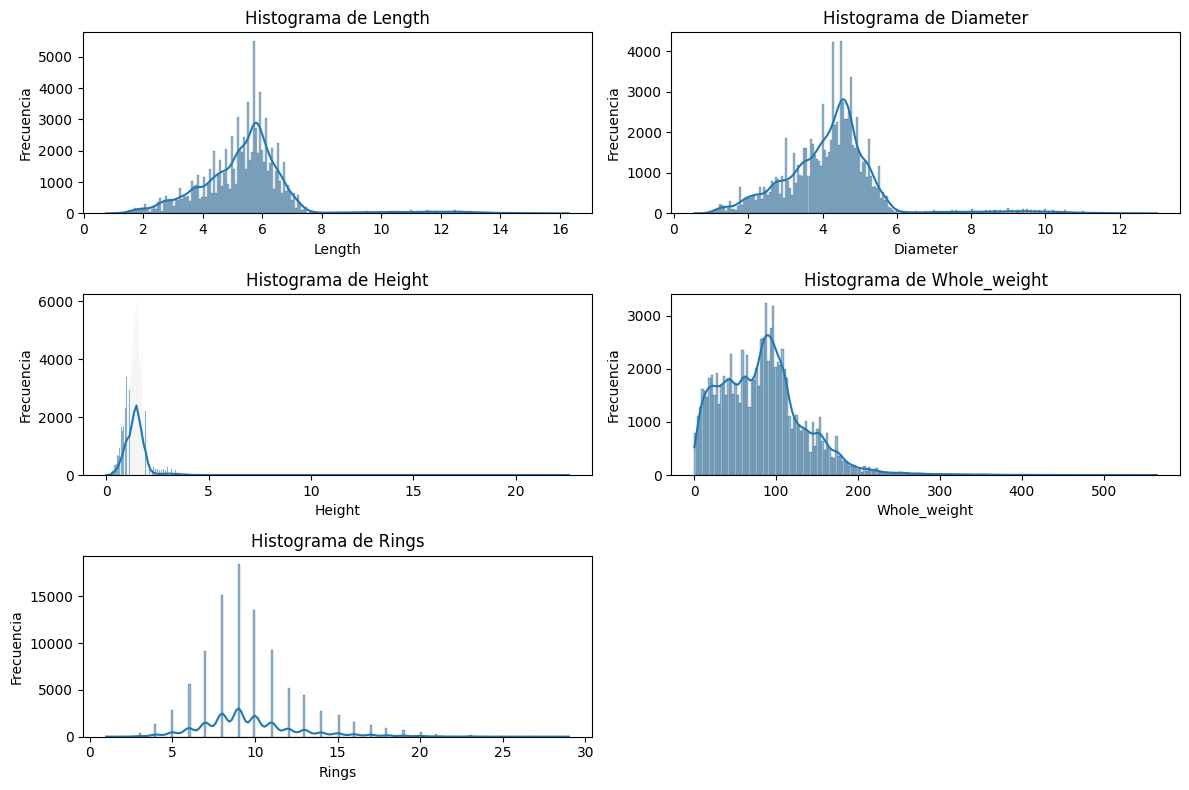

In [62]:
# Lista de columnas para hacer histogramas
col_hist = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Rings']

# Configuración de tamaño de la figura
plt.figure(figsize=(12, 8))

# Iteración sobre las columnas para generar histogramas
for i, columna in enumerate(col_hist, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_c[columna], kde=True)  # Utilizamos histplot en lugar de boxplot
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


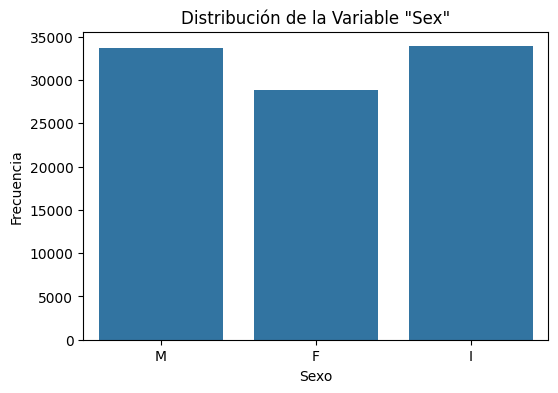

In [64]:
# Configuración de tamaño de la figura
plt.figure(figsize=(6, 4))

# Gráfico de barras para la variable "Sex"
sns.countplot(x='Sex', data = df_c)
plt.title('Distribución de la Variable "Sex"')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

plt.show()


CORTAMOS LENGTH DIAMETER Y WEIGHT



In [65]:
# Seleccionar las filas que cumplen con las condiciones especificadas
df_c = df_c.loc[(df_c['Length'] <= 13.5) &
                 (df_c['Diameter'] <= 6.5) &
                 (df_c['Height'] <= 2.7) &
                 (df_c['Rings'] <= 23)]

# Verificar la forma del DataFrame filtrado
df_c.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sex,Length,Diameter,Height,Whole_weight,Rings
0,M,4.55,3.65,0.95,51.40,15
1,M,3.50,2.65,0.90,22.55,7
2,F,5.30,4.20,1.35,67.70,9
3,M,4.40,3.65,1.25,51.60,10
4,I,3.30,2.55,0.80,20.50,7
5,I,4.25,3.00,0.95,35.15,8
6,F,5.30,4.15,1.50,77.75,20
7,F,5.45,4.25,1.25,76.80,16
8,M,4.75,3.70,1.25,50.95,9
9,F,5.50,4.40,1.50,89.45,19


In [66]:
print("Forma del DataFrame después de aplicar los cortes:", df_c.shape)

Forma del DataFrame después de aplicar los cortes: (92830, 6)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


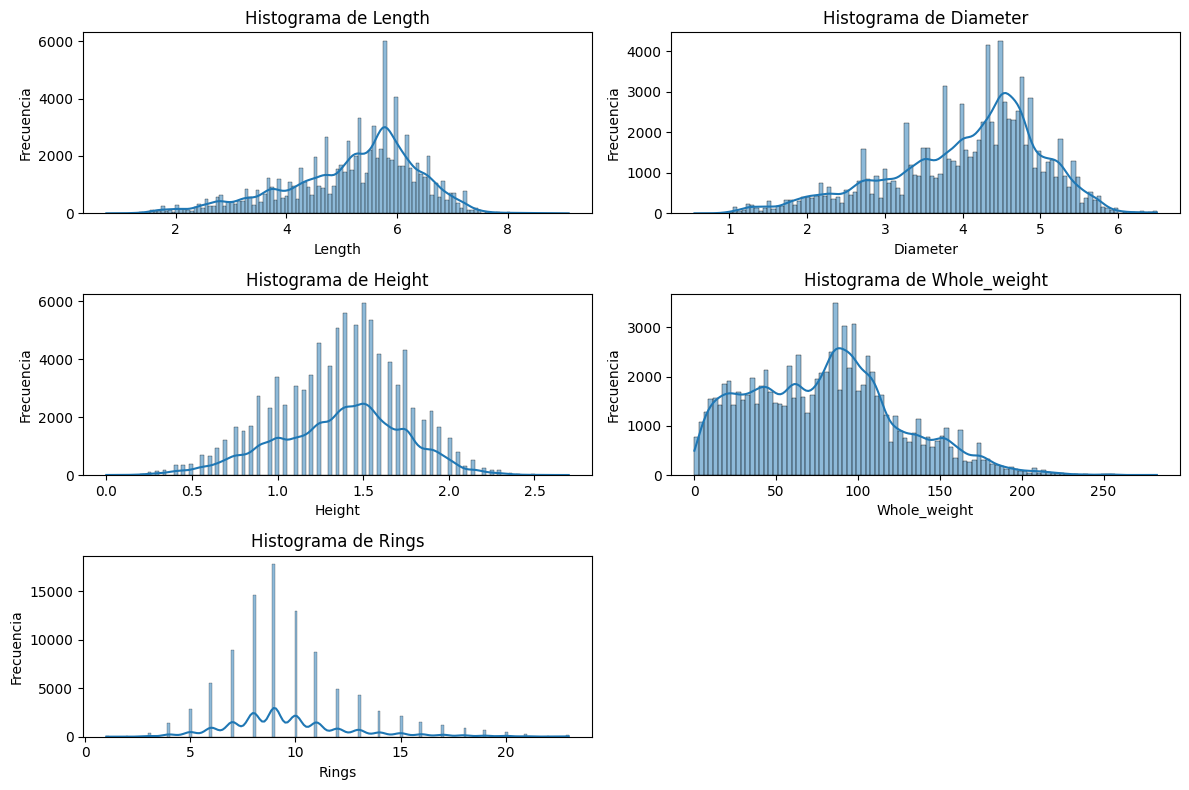

In [67]:
# Lista de columnas para hacer histogramas
col_hist2 = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Rings']

# Configuración de tamaño de la figura
plt.figure(figsize=(12, 8))

# Iteración sobre las columnas para generar histogramas
for i, columna in enumerate(col_hist2, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_c[columna], kde=True)  # Utilizamos histplot en lugar de boxplot
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [68]:
# Lista de columnas para calcular la matriz de correlación
col_hist3 = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Rings']

# Crear una copia del DataFrame con solo las columnas de interés
df_regr = df_c[col_hist3].copy()

# Convertir la variable categórica 'Sex' a una representación numérica
df_regr['Sex'] = df_regr['Sex'].astype('category').cat.codes

# Calcular la matriz de correlación
matriz_correlacion = df_regr.corr()

# Visualizar la matriz de correlación
print("Matriz de Correlación:")
print(matriz_correlacion)

Matriz de Correlación:
                   Sex    Length  Diameter    Height  Whole_weight     Rings
Sex           1.000000 -0.022581 -0.023814 -0.031246     -0.029505 -0.029144
Length       -0.022581  1.000000  0.988907  0.923046      0.907423  0.599061
Diameter     -0.023814  0.988907  1.000000  0.927403      0.914766  0.616819
Height       -0.031246  0.923046  0.927403  1.000000      0.894805  0.656076
Whole_weight -0.029505  0.907423  0.914766  0.894805      1.000000  0.613844
Rings        -0.029144  0.599061  0.616819  0.656076      0.613844  1.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


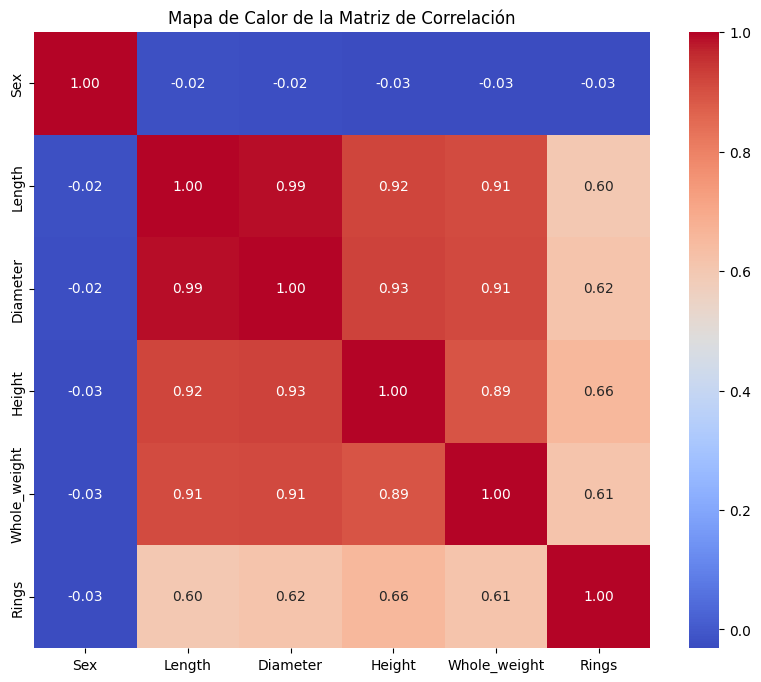

In [69]:
# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

In [70]:
df_regr = df_regr.drop(columns=['Length'])
df_regr = df_regr.drop(columns=['Sex'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
num_datos = df_regr.shape[0]  # Obtiene el número de filas
print("El número de datos en el DataFrame df_regr es:", num_datos)

El número de datos en el DataFrame df_regr es: 92830


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
df_regr.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Diameter        0
Height          0
Whole_weight    0
Rings           0
dtype: int64

In [73]:
for col in ['Diameter', 'Height', 'Whole_weight', 'Rings']:
    if col != "Rings":
        # Discretize with 15 bins for continuous data
        df_regr[col] = pd.DataFrame(discretizar(df_regr, col, 15), columns=[col])
    else:
        # Discretize with 5 bins for the 'Rings' column
        df_regr[col] = pd.DataFrame(discretizar(df_regr, col, 5), columns=[col])

# Eliminar filas que contienen valores NaN
df_regr.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
x = df_regr.drop(columns=['Rings'])  # Variables independientes
y = df_regr["Rings"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
num_datos = df_regr.shape[0]  # Obtiene el número de filas
print("El número de datos en el DataFrame df_regr es:", num_datos)

El número de datos en el DataFrame df_regr es: 87014


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
import matplotlib.pyplot as plt

folds = [100, 500, 1000, 1500, 2000, 2500, 3000]
accuracies = []

for i in folds:
    _, accuracy, _, _ = division_Kfolds(i, x, y)
    accuracies.append(max(accuracy))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La máxima precisión es 100 divisiones es 71.15
La máxima precisión es 500 divisiones es 78.86
La máxima precisión es 1000 divisiones es 87.36
La máxima precisión es 1500 divisiones es 93.1
La máxima precisión es 2000 divisiones es 90.91
La máxima precisión es 2500 divisiones es 100.0
La máxima precisión es 3000 divisiones es 96.55


In [77]:
accuracies = [71.15, 78.86, 87.36, 93.1, 90.91, 100.0, 96.55]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


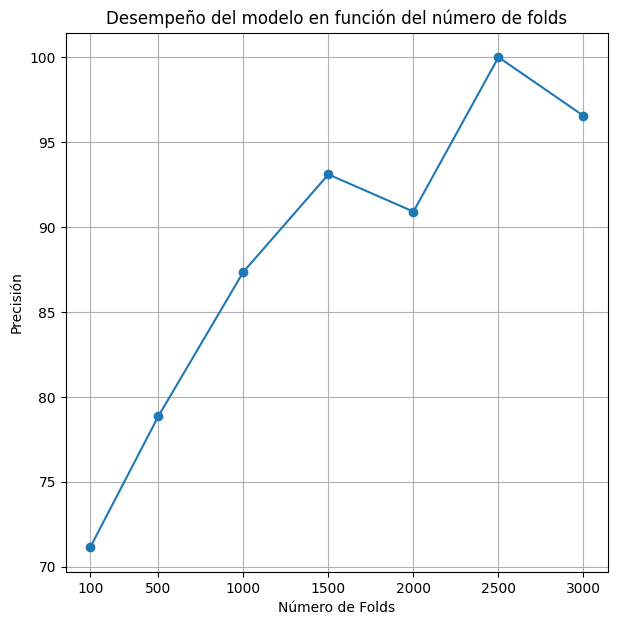

In [78]:
# Graficar el desempeño en función del número de folds
plt.figure(figsize=(7, 7))
plt.plot(folds, accuracies, marker='o', linestyle='-')
plt.title('Desempeño del modelo en función del número de folds')
plt.xlabel('Número de Folds')
plt.ylabel('Precisión')
plt.grid(True)
plt.xticks(folds)
plt.show()

explicar

In [82]:
ltrain, laccuracy, x_test, y_test = division_Kfolds(1500, x, y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


La máxima precisión es 1500 divisiones es 93.1


In [84]:
# Escogemos la mejor división (1500)
max_index = laccuracy.index(max(laccuracy))
model = DecisionTreeClassifier()
model.fit(x.iloc[ltrain[max_index]], y.iloc[ltrain[max_index]])
print("Visualización de atributos relacionadas con los Rings predichos")
permutacion = PermutationImportance(model, random_state = 0).fit(x_test, y_test)

Visualización de atributos relacionadas con los Rings predichos


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
# Generar la tabla con el color de fondo personalizado
html_table = eli5.show_weights(permutacion, feature_names=x_test.columns.tolist()).data

# Cambiar el color de fondo de la tabla
html_table = html_table.replace('<table ', '<table style="background-color: #FFA500;" ')

# Mostrar la tabla HTML
from IPython.display import HTML
HTML(html_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Weight,Feature
0.1759 ± 0.0507,Whole_weight
0.1207 ± 0.1647,Diameter
0.0759 ± 0.0414,Height
